In [125]:
#import necessary dependency packages
import lpips
import numpy as np

In [ ]:
#Test for LPIPS library verification -- Not run
!python PerceptualSimilarity/lpips_2imgs.py -p0 LPIPS_example/1_.png -p1 LPIPS_example/3_.png

In [126]:
#Import the test images and convert them to numppy array for patch creation
from PIL import Image
im1 = Image.open("LPIPS_example/1_.png").convert('RGB')
im3 = Image.open("LPIPS_example/3_.png")

#Load the image into a numpy array for patch creation using sklearn
numpyImageData1 = np.asarray(im1)
numpyImageData3 = np.asarray(im3)

In [127]:
from sklearn.feature_extraction import image
#Extract patches with size 100, 100 (Randomly chosen number)
#Note: Larger patch size results in longer time
patchesofImage1 = image.extract_patches_2d(numpyImageData1, (100,100))
patchesofImage3 = image.extract_patches_2d(numpyImageData3, (100,100))

In [128]:
import random
randomIndex = random.sample(range(1, 384090), 5)

patchesofImage1_random = np.zeros(shape=(5,100,100,3), dtype=np.uint8)
patchesofImage3_random = np.zeros(shape=(5,100,100,3), dtype=np.uint8)

#Copy patches that have been created randomly for similarity measurements
for index, values in np.ndenumerate(randomIndex):
    patchesofImage1_random[index] = patchesofImage1[values]
    patchesofImage3_random[index] = patchesofImage3[values]


In [129]:
#Save patches as png files (There might be a better way to run the LPIPS code to avoid temp storage)
for idx in range(0, 5):
    pathToPatches1 = "LPIPS_example/PatchesDirectory/patch1_" + str(idx) +".png"
    pathToPatches3 = "LPIPS_example/PatchesDirectory/patch3_" + str(idx) +".png"
    Image.fromarray(patchesofImage1_random[idx]).save(pathToPatches1)
    Image.fromarray(patchesofImage3_random[idx]).save(pathToPatches3)


In [130]:
#Copy the result of similarity measurement algorith to a local structure to use for plotting
data = np.zeros(shape=(5,5), dtype=object)
data[0] = !python PerceptualSimilarity/lpips_2imgs.py -p0 LPIPS_example/PatchesDirectory/patch1_0.png -p1 LPIPS_example/PatchesDirectory/patch3_0.png
data[1] = !python PerceptualSimilarity/lpips_2imgs.py -p0 LPIPS_example/PatchesDirectory/patch1_1.png -p1 LPIPS_example/PatchesDirectory/patch3_1.png
data[2] = !python PerceptualSimilarity/lpips_2imgs.py -p0 LPIPS_example/PatchesDirectory/patch1_2.png -p1 LPIPS_example/PatchesDirectory/patch3_2.png
data[3] = !python PerceptualSimilarity/lpips_2imgs.py -p0 LPIPS_example/PatchesDirectory/patch1_2.png -p1 LPIPS_example/PatchesDirectory/patch3_3.png
data[4] = !python PerceptualSimilarity/lpips_2imgs.py -p0 LPIPS_example/PatchesDirectory/patch1_4.png -p1 LPIPS_example/PatchesDirectory/patch3_4.png

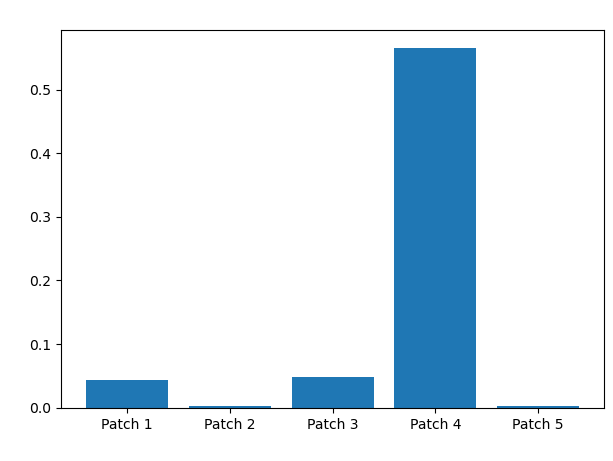

In [132]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

x_axis =["Patch 1", "Patch 2", "Patch 3", "Patch 4", "Patch 5"]
y_axis = [float(data[idx][4][11:]) for idx in range(0, 5)]
# creating the bar plot
plt.bar(x_axis, y_axis)
plt.xlabel("Randomly selected patches", color='White')
plt.ylabel("Distance between patches of 2 images", color='White')
plt.title("LPIPS Similarity between patches of images", color='White')
plt.show()
